In [4]:
import math
import random
import datetime
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib import pyplot as plt
import numpy as np
import mpl_toolkits.mplot3d.axes3d as p3
from matplotlib import animation

%matplotlib inline

import matplotlib.animation as animation

rc('animation', writer='ffmpeg')
rc('animation', html='html5')

In [97]:
maturity = 2 # years also known as T
drift = 0.05 # 5% also known as mu
vol = 0.11 # 10% also known as sigma
timestep = 0.01 # 3.65 days also known as dt

In [ ]:
timesteps = np.linspace(0, T, N-1)
numsteps = round(years/dt)

In [131]:
paths = 100
trajectories = []
for path in range(paths):
    s0 = 100 # stock price at time 0
    price = s0

    prices = []
    for timestep in timesteps:
        ret = \
            (drift - 0.5 * vol**2) * dt + \
            vol * np.sqrt(dt) * np.random.standard_normal()

        price = price * np.exp(ret)
        prices.append(price)
        
    trajectories.append(prices)
    

In [ ]:
fig, ax = plt.subplots(figsize=(10,5));
for trajectory in trajectories:
    plt.plot(trajectory, linewidth=1)
plt.show()

In [133]:
list(range(2))

[0, 1]

199


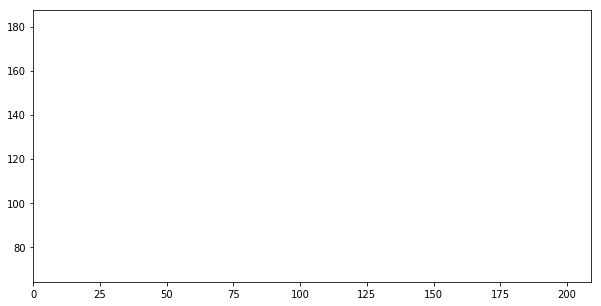

In [135]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots(figsize=(10,5));

maxlim = max([max(trajectory) for trajectory in trajectories])
minlim = min([min(trajectory) for trajectory in trajectories])

_ = ax.set_ylim(( minlim - 10, maxlim + 10))
_ = ax.set_xlim(( 0, len(trajectories[0]) + 10))

lines = []
for trajectory in trajectories:
    line, = ax.plot([], [], lw=1)
    lines.append(line)

# initialization function: plot the background of each frame
def init():
    for i in range(len(lines)):  
        lines[i].set_data([], [])
        
    return lines

# animation function. This is called sequentially
def animate(step):
    for i in range(len(lines)):
        lines[i].set_data(list(range(step)), trajectories[i][:step])

N = len(trajectories[0])
print (N)
anim = animation.FuncAnimation(
    fig, 
    animate, 
    init_func=init, 
    frames=N, 
    interval=10000/N, 
    blit=False)

anim

In [136]:
anim.save("montecarlo.mp4")